<a href="https://colab.research.google.com/github/amitmldlai/Implementation-of-Logistic-Regression-with-L2-regularization/blob/main/Implementation_of_Logistic_Regression_with_L2_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [127]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

**Creating custom dataset**

In [128]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5, n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

**Splitting data into train and test**

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [130]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))




#Implementation of Logistic Regression with L2 regularizationA




<br>

* Initialize the weight_vector and intercept term to zeros 

* Define a loss function

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (let batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept , <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights 
    - append the loss in the list (this will be used to see how loss is changing for each epoch after the training is over)


$sigmoid(z)= 1/(1+exp(-z))$

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

**Implementing logistic regression**

In [131]:
class CustomLogisticRegression:
  def __init__(self, alpha, eta0, epoch):
    self.alpha = alpha  # regularizer multipler
    self.eta0 = eta0    # learning rate
    self.epoch = epoch  # number of epochs
    self.train_loss, self.test_loss = list(), list()  # to store train and test loss
    self.coef_ = None   # weight matrix
    self.intercept_ = None  # intercept term
    
  def initialize_weights(self, row_vector):
    w = np.zeros_like(row_vector, dtype = int)  #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    b = 0  #initialize bias to zero
    return w, b  

  def sigmoid(self, z):
    output = 1/(1+(1/math.exp(z)))  # return sigmoid of z
    return output  
  
  def gradient_dw(self, x, y, w, b, alpha, N):  # to compute the gardient w.r.t to w
    sig_x = np.dot(w, x) + b  # scalar
    inter = y - self.sigmoid(sig_x)
    next = x * inter
    residue = alpha/N * w.T  
    dw = next - residue
    return dw

  def gradient_db(self, x, y, w, b):  # to compute gradient w.r.to b
   sig_x = np.dot(w, x) + b
   db = y - self.sigmoid(sig_x)
   return db   

  def logloss(self, y_true, y_pred):
    sign = -1
    first = np.multiply(y_true, np.log10(y_pred))
    second = np.multiply((1 - y_true), np.log10(1- y_pred))
    total = np.sum(first+second)
    loss = sign * total/len(y_true)
    return loss  

  def pred(self, w, b, X):  # prediction function used to compute predicted_y given the dataset X
    N = len(X)
    predict = []
    for i in range(N):
        z = np.dot(w, X[i]) + b
        predict.append(self.sigmoid(z))
    return np.array(predict)  

  def fit(self, X_train, y_train, X_test, y_test):
    N = len(X_train)      
    w, b = self.initialize_weights(X_train[0]) # Initialize the weights
    for i in range(0, self.epoch):
      for j in range(0, len(X_train)):
        w_out  = self.gradient_dw(X_train[j], y_train[j], w, b, self.alpha, N)  # compute gradient w.r.to w (call the gradient_dw() function)
        b_out  = self.gradient_db(X_train[j],y_train[j], w, b)  # compute gradient w.r.to b (call the gradient_db() function)
        w = w + self.eta0*w_out  # update w, 
        b = b + self.eta0*b_out  # update b, eta0 is learning rate
      self.coef_ = w
      self.intercept_ = np.array(b)  
      y_pred_train = self.pred(w, b, X_train)  # predict the output of x_train using pred function with updated weights
      self.train_loss.append(self.logloss(y_train, y_pred_train))  # compute and store the loss between predicted and actual values (call the loss function)
      y_pred_test = self.pred(w, b, X_test)  # predict the output of x_test using pred function with updated weights
      self.test_loss.append(self.logloss(y_test, y_pred_test))  # compute and store the loss between predicted and actual values (call the loss function)
    return  

  def plot(self):
    plt.figure(figsize=(10, 7))
    epoch_number = np.arange(self.epoch)
    plt.plot(epoch_number, self.train_loss, label = 'Train loss', linewidth = 3)
    plt.plot(epoch_number, self.test_loss, label = 'Test loss', linewidth = 3)
    plt.xlabel("Epoch")
    plt.xticks(np.arange(1, self.epoch+1))
    plt.legend()
    plt.grid(True)
    plt.ylabel("Train-Test Loss")
    plt.title("Loss vs Epoch")
    plt.show() 

In [132]:
customlr_clf = CustomLogisticRegression(alpha = 0.001, eta0 = 0.0001, epoch = 10)
customlr_clf.fit(X_train, y_train, X_test, y_test)

**Plot loss vs Epoch**

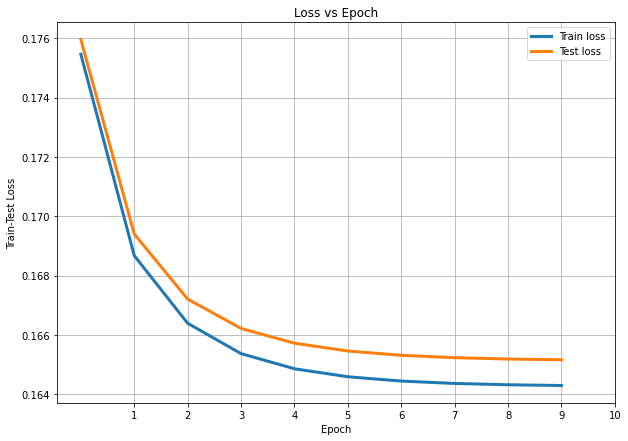

In [133]:
customlr_clf.plot()

# Sklearn Logistic Regression using SGD classifier 

In [136]:
sklearn_clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')

In [137]:
sklearn_clf.fit(X = X_train, y = y_train) # fitting the model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

#Compare the custom implementation and sklearn Logistic Regression SGDClassifier's the weights and intercept

In [138]:
def differece_check(customlr_clf, sklearn_clf):
  val_coef = np.abs(np.array(customlr_clf.coef_ - sklearn_clf.coef_))
  val_intercept = np.abs(customlr_clf.intercept_ - sklearn_clf.intercept_)
  assert(np.all(val_coef <= 0.05) and val_intercept <= 0.01)
  return 'Difference between custom implementaion and sklearn implementation is of order 1 %'

In [139]:
differece_check(customlr_clf, sklearn_clf)

'Difference between custom implementaion and sklearn implementation is of order 1 %'

**Conclusion:**



*   The difference between weights andd intercept of custom implementaion and sklearn implementation is of order 1 %, which is pretty close which shows our implememntation is quite close to sklearn's implementation.

